<a href="https://colab.research.google.com/github/twlee-dev/lab/blob/main/Project_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
import pandas as pd
# 구글 드라이브 마운트
drive.mount('/content/drive')
# CSV 파일 경로 지정
# 예시: MyDrive 안의 'data' 폴더에 'dating.csv' 파일이 있다고 가정
file_path = '/content/drive/MyDrive/user_data.csv'
 # 데이터 불러오기
user_data = pd.read_csv(file_path)
#데이터의 상위 5번째 행까지 출력
user_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13270,1,200,366,590.0,590.0,1,NaN,1,0,0.0
1,17948,1,144,147,358.6,358.6,1,NaN,1,0,0.0
2,12603,1,56,21,613.2,613.2,1,NaN,1,0,0.0
3,15180,1,36,367,87.5,87.5,6,0.0,1,0,0.0
4,13807,1,36,367,112.6,112.6,7,0.0,1,0,0.0


In [66]:
user_data['average_interval'].fillna(0.0, inplace=True)
user_data.head()

/tmp/ipython-input-841858889.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13270,1,200,366,590.0,590.0,1,0.0,1,0,0.0
1,17948,1,144,147,358.6,358.6,1,0.0,1,0,0.0
2,12603,1,56,21,613.2,613.2,1,0.0,1,0,0.0
3,15180,1,36,367,87.5,87.5,6,0.0,1,0,0.0
4,13807,1,36,367,112.6,112.6,7,0.0,1,0,0.0


In [71]:
from scipy import stats
import numpy as np

In [72]:
# Z-score 계산
z_scores = stats.zscore(user_data.iloc[:, 1:], axis=0)

# Z-score 절대값 계산
z_scores = np.abs(z_scores)

# Z-score 출력
z_scores

array([[ 0.43970865,  0.19650017,  2.71680505, ...,  0.43970865,
         0.39467476,  0.60293741],
       [ 0.43970865,  0.20849527,  0.54765808, ...,  0.43970865,
         0.39467476,  0.60293741],
       [ 0.43970865,  0.22734472,  0.70034429, ...,  0.43970865,
         0.39467476,  0.60293741],
       ...,
       [13.21395315,  1.03128414,  0.8984399 , ..., 13.21395315,
        17.42170499,  0.97628853],
       [26.09684372, 16.21601152,  0.8984399 , ..., 26.09684372,
        22.00305978,  0.42243143],
       [18.05880088,  4.60432497,  0.8984399 , ..., 18.05880088,
        22.5120992 ,  0.89901926]])

In [73]:
# 임계값(threshold) 설정
threshold = 3

# z-score 기준으로 이상치를 찾아서 outlier 컬럼에 이상치 여부 기입 (0: 정상, 1:이상치)
user_data['outlier'] = (z_scores > threshold).any(axis=1).astype(int)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,outlier
0,13270,1,200,366,590.0,590.0,1,0.0,1,0,0.0,0
1,17948,1,144,147,358.6,358.6,1,0.0,1,0,0.0,0
2,12603,1,56,21,613.2,613.2,1,0.0,1,0,0.0,0
3,15180,1,36,367,87.5,87.5,6,0.0,1,0,0.0,0
4,13807,1,36,367,112.6,112.6,7,0.0,1,0,0.0,0


/tmp/ipython-input-3747334697.py:6: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



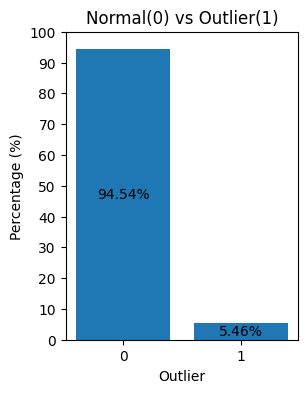

In [74]:
# 시각화에 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt

# user_data['outlier']을 활용하여 이상치 여부에 따른 확률 계산
# value_counts()는 열의 고윳값의 개수를 반환하지만 normalize=True를 사용하면 열에 있는 값의 개수 비율(상대적 빈도)을 반환함
outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True) * 100

# 시각화 자료 크기 조정
plt.figure(figsize=(3, 4))

# outlier_percentage라는 데이터로 bar chart 시각화
# x축 값을 0과 1로 지정
bars = plt.bar(['0', '1'], outlier_percentage)

# 퍼센트(%) 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', fontsize=10, va='center', ha='center')

plt.title('Normal(0) vs Outlier(1)') # 표 제목
plt.yticks(ticks=np.arange(0, 101, 10)) # y축 표기 (0~100까지 10단위로 증가)
plt.ylabel('Percentage (%)') # y축 범례
plt.xlabel('Outlier') # x축 범례
plt.show() # 출력

In [75]:
# 정상 데이터만 필터링
user_data = user_data[user_data['outlier'] == 0]

# outlier 컬럼 삭제
user_data = user_data.drop(columns=['outlier'])

# DataFrame의 인덱스를 리셋하고, 이전 인덱스를 컬럼으로 추가하지 않음
user_data.reset_index(inplace=True, drop=True)

# Fill NaN values in 'average_interval' with 0.0 after filtering
user_data['average_interval'].fillna(0.0, inplace=True)

user_data.head()

/tmp/ipython-input-1689402661.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13270,1,200,366,590.0,590.0,1,0.0,1,0,0.0
1,17948,1,144,147,358.6,358.6,1,0.0,1,0,0.0
2,12603,1,56,21,613.2,613.2,1,0.0,1,0,0.0
3,15180,1,36,367,87.5,87.5,6,0.0,1,0,0.0
4,13807,1,36,367,112.6,112.6,7,0.0,1,0,0.0


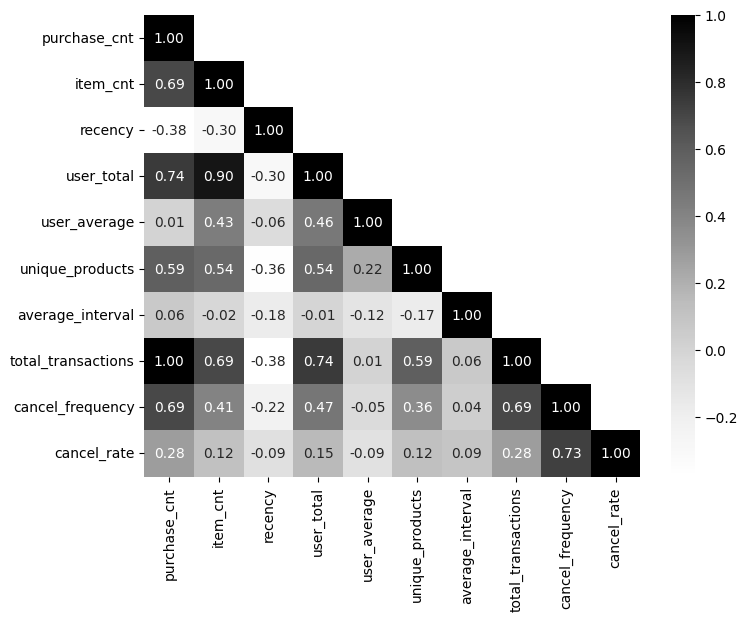

In [76]:
# 시각화 라이브러리 불러오기
import seaborn as sns

# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = user_data.drop(columns=['CustomerID']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

In [77]:
# Standard Scaler 불러오기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
# 원본 데이터에 영향을 주지 않기 위해 복사
data = user_data.copy()

# CustomerID를 제외한 데이터에 스케일링 적용
columns_list = data.iloc[:, 1:].columns # iloc: 데이터 특정 값 추출, columns: 데이터프레임의 열 이름 조회
data[columns_list] = scaler.fit_transform(data[columns_list])

In [79]:
# 스케일링 된 데이터 출력
data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,13270,-0.712696,-0.489994,2.728542,-0.361850,1.111483,-0.953462,-0.583202,-0.712696,-0.537907,-0.602239
1,17948,-0.712696,-0.541332,0.540673,-0.488085,0.202026,-0.953462,-0.583202,-0.712696,-0.537907,-0.602239
2,12603,-0.712696,-0.622006,-0.718100,-0.349194,1.202664,-0.953462,-0.583202,-0.712696,-0.537907,-0.602239
3,15180,-0.712696,-0.640341,2.738532,-0.635978,-0.863462,-0.864310,-0.583202,-0.712696,-0.537907,-0.602239
4,13807,-0.712696,-0.640341,2.738532,-0.622285,-0.764813,-0.846480,-0.583202,-0.712696,-0.537907,-0.602239


In [80]:
# PCA 불러오기
from sklearn.decomposition import PCA

# CustomerID를 인덱스로 지정
data.set_index('CustomerID', inplace=True)

# Fill NaN values in 'average_interval' with the mean
data['average_interval'].fillna(data['average_interval'].mean(), inplace=True)

# PCA 적용
pca = PCA().fit(data)

/tmp/ipython-input-1751810899.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [81]:
# Explained Variance의 누적합 계산
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

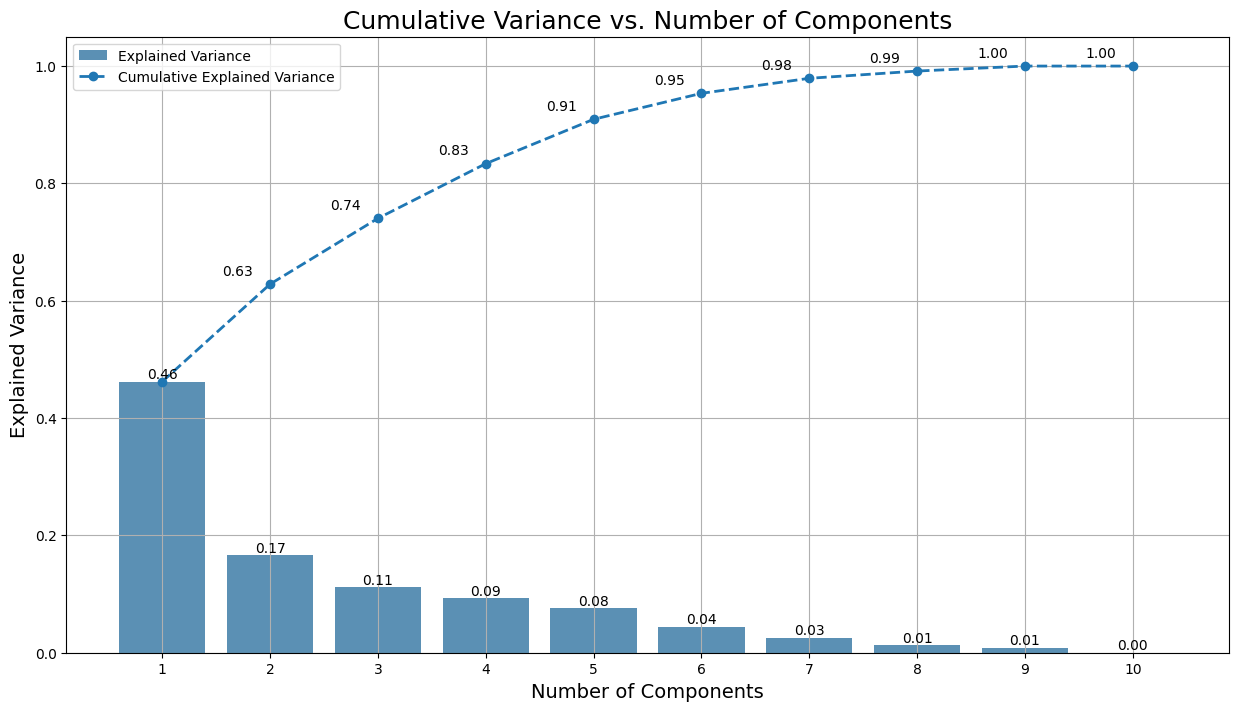

In [82]:
plt.figure(figsize=(15, 8))

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()

In [83]:
# 6개의 주성분을 유지하는 PCA 선언
pca = PCA(n_components=6)

# 기존 data를 pca에 fit_transform
data_pca = pca.fit_transform(data)

# 압축된 데이터 셋 생성
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 CustomerID 다시 추가
data_pca.index = data.index

In [26]:
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
13270,-2.008282,0.898438,-1.312749,1.467597,1.536500,0.339517
17948,-1.713241,0.390273,-0.090035,0.291780,0.221750,-0.354283
12603,-1.303655,0.993567,0.305752,0.386291,-1.015717,-0.726894
15180,-2.371593,-0.278702,-1.164560,0.254311,2.073071,0.335319
13807,-2.348985,-0.217169,-1.185448,0.299379,2.039401,0.351721


In [84]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pca)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_)

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
user_data['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
data_pca['cluster'] = new_labels

In [54]:
# K-Means 분류된 결과 보기
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
0,13270,1,200,366,590.0,590.0,1,0.0,1,0,0.0,0
1,17948,1,144,147,358.6,358.6,1,0.0,1,0,0.0,0
2,12603,1,56,21,613.2,613.2,1,0.0,1,0,0.0,0
3,15180,1,36,367,87.5,87.5,6,0.0,1,0,0.0,0
4,13807,1,36,367,112.6,112.6,7,0.0,1,0,0.0,0


In [85]:
# 각 군집별로 몇 명의 고객이 있는지 확인
user_data.value_counts('cluster')

,count
cluster,
0,2685
1,1020
2,419


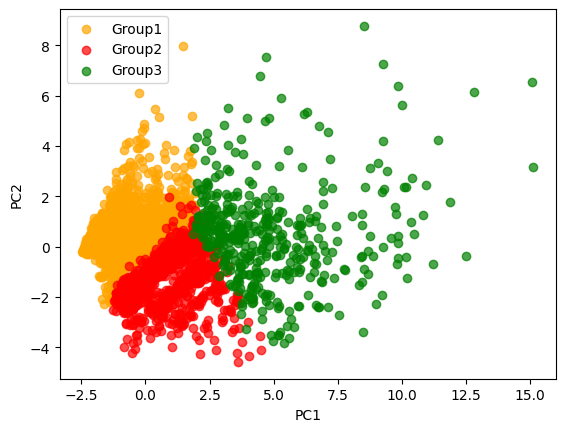

In [86]:
# 각 클러스터 별 데이터 분리
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]


# 클러스터 별 시각화
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], color = 'green', alpha = 0.7, label = 'Group3')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [87]:
!pip install plotly==5.18.0

In [88]:
# 색상 지정
colors = ['red', 'blue', 'green']

# 각 클러스터별 데이터 분릴
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]

# 3D Scatter Plot 생성
import plotly.graph_objects as go
fig = go.Figure()

# 각 클러스터별 데이터 표기
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'],
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Group 1'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'],
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Group 2'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'],
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Group 3'))

# 범례 및 제목 영역 설정
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

In [89]:
group1 = user_data[user_data['cluster'] == 0]
group2 = user_data[user_data['cluster'] == 1]
group3 = user_data[user_data['cluster'] == 2]

In [90]:
group1.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.0,2685.0,2685.0
mean,15350.222719,2.192924,403.913966,110.536685,658.168082,309.235903,39.740410,2.299754,2.192924,0.0,0.0,0.0
std,1714.217681,1.661799,453.528139,105.426265,667.961511,253.503077,41.108395,4.544667,1.661799,0.0,0.0,0.0
min,12348.000000,1.000000,1.000000,0.000000,3.800000,3.800000,1.000000,0.000000,1.000000,0.0,0.0,0.0
25%,13849.000000,1.000000,117.000000,25.000000,216.400000,154.900000,12.000000,0.000000,1.000000,0.0,0.0,0.0
50%,15394.000000,2.000000,245.000000,67.000000,414.000000,241.500000,26.000000,0.040000,2.000000,0.0,0.0,0.0
75%,16825.000000,3.000000,504.000000,182.000000,844.900000,376.700000,52.000000,2.650000,3.000000,0.0,0.0,0.0
max,18287.000000,11.000000,4300.000000,373.000000,4892.200000,3096.000000,312.000000,35.890000,11.000000,0.0,0.0,0.0


In [91]:
group2.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.0
mean,15232.186275,5.096078,668.370588,75.749020,1202.819804,241.638333,54.859804,3.730294,5.096078,1.447059,31.920431,1.0
std,1703.570809,2.553564,518.069448,87.545316,835.467210,162.187033,41.058002,4.779788,2.553564,0.851104,13.488665,0.0
min,12352.000000,2.000000,-303.000000,0.000000,6.200000,3.100000,1.000000,0.000000,2.000000,0.000000,0.000000,1.0
25%,13768.750000,3.000000,258.000000,15.000000,533.300000,143.450000,23.000000,1.077500,3.000000,1.000000,20.000000,1.0
50%,15210.000000,5.000000,542.500000,39.000000,1033.050000,203.200000,46.000000,2.330000,5.000000,1.000000,33.330000,1.0
75%,16689.250000,7.000000,993.000000,100.000000,1688.600000,291.150000,77.250000,4.152500,7.000000,2.000000,50.000000,1.0
max,18282.000000,14.000000,2777.000000,372.000000,5113.000000,1764.200000,297.000000,36.000000,14.000000,6.000000,60.000000,1.0


In [92]:
group2.describe()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,cluster
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.0
mean,15232.186275,5.096078,668.370588,75.749020,1202.819804,241.638333,54.859804,3.730294,5.096078,1.447059,31.920431,1.0
std,1703.570809,2.553564,518.069448,87.545316,835.467210,162.187033,41.058002,4.779788,2.553564,0.851104,13.488665,0.0
min,12352.000000,2.000000,-303.000000,0.000000,6.200000,3.100000,1.000000,0.000000,2.000000,0.000000,0.000000,1.0
25%,13768.750000,3.000000,258.000000,15.000000,533.300000,143.450000,23.000000,1.077500,3.000000,1.000000,20.000000,1.0
50%,15210.000000,5.000000,542.500000,39.000000,1033.050000,203.200000,46.000000,2.330000,5.000000,1.000000,33.330000,1.0
75%,16689.250000,7.000000,993.000000,100.000000,1688.600000,291.150000,77.250000,4.152500,7.000000,2.000000,50.000000,1.0
max,18282.000000,14.000000,2777.000000,372.000000,5113.000000,1764.200000,297.000000,36.000000,14.000000,6.000000,60.000000,1.0
